In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
plt.rcParams.update({'font.size': 9})
import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_df(path):
    df = pd.read_csv(path, index_col='Unnamed: 0')
    return df

def get_val_nll(df):
    return df.val_or_test_nll.values[-1]

def get_val_acc(df):
    return df.val_or_test_acc.values[-1]

def get_last_epoch(df):
    return df.iloc[-1]

def get_results(df, experiments_path):
    columns = ['n', 'prior_scale', 'prior_type', 'random_state', 'test_acc', 'test_loss', 'test_nll', 
           'test_prior', 'train_acc', 'train_loss', 'train_nll', 'train_prior']
    results = pd.DataFrame(columns=columns)
    for row_index, row in df.iterrows():
        if row.prior_scale:
            model_name = f'{row.prior_type}_lr_0={row.lr_0}_n={row.n}_prior_scale={row.prior_scale}_random_state={row.random_state}_weight_decay={row.weight_decay}'
        else:
            model_name = f'{row.prior_type}_lr_0={row.lr_0}_n={row.n}_random_state={row.random_state}_weight_decay={row.weight_decay}'
        path =  f'{experiments_path}/{model_name}.csv'
        last_epoch = get_last_epoch(get_df(path))
        results_row = [int(row.n), row.prior_scale, row.prior_type, int(row.random_state), 
                       last_epoch.val_or_test_acc, last_epoch.val_or_test_loss, 
                       last_epoch.val_or_test_nll, last_epoch.val_or_test_prior, 
                       last_epoch.train_acc, last_epoch.train_loss, 
                       last_epoch.train_nll, last_epoch.train_prior]
        results.loc[results.shape[0]] = results_row
    return results

In [3]:
data = {
    'lr_0': [0.0100, 0.0100, 0.0001, 0.0100, 0.0100],
    'n': [10, 100, 1000, 10000, 50000],
    'prior_scale': [None, None, None, None, None],
    'prior_type': ['nonlearned', 'nonlearned', 'nonlearned', 'nonlearned', 'nonlearned'],
    'random_state': [1001, 1001, 1001, 1001, 1001],
    'weight_decay': [0.0100, 0.0000, 0.0001, 0.0010, 0.0010],
}
nonlearned_hyperparameters = pd.DataFrame(data)
nonlearned_hyperparameters.head()

,lr_0,n,prior_scale,prior_type,random_state,weight_decay
0,0.0100,10,None,nonlearned,1001,0.0100
1,0.0100,100,None,nonlearned,1001,0.0000
2,0.0001,1000,None,nonlearned,1001,0.0001
3,0.0100,10000,None,nonlearned,1001,0.0010
4,0.0100,50000,None,nonlearned,1001,0.0010


In [4]:
# TODO: Fill experiments_path with path to experiments
experiments_path = 
results = get_results(nonlearned_hyperparameters, experiments_path)
results

,n,prior_scale,prior_type,random_state,test_acc,test_loss,test_nll,test_prior,train_acc,train_loss,train_nll,train_prior
0,10,None,nonlearned,1001,0.1317,3.200835,3.200835,0.0,1.00000,0.017939,0.017939,0.0
1,100,None,nonlearned,1001,0.5301,1.753938,1.753938,0.0,1.00000,0.000018,0.000018,0.0
2,1000,None,nonlearned,1001,0.7818,0.689700,0.689700,0.0,0.99900,0.021214,0.021214,0.0
3,10000,None,nonlearned,1001,0.9372,0.226423,0.226423,0.0,1.00000,0.000120,0.000120,0.0
4,50000,None,nonlearned,1001,0.9674,0.106618,0.106618,0.0,0.99996,0.001602,0.001602,0.0


In [5]:
grouped_results = results.groupby(['n', 'prior_type']).agg(lambda x: tuple(x))
columns = ['test_acc', 'train_acc']
for column in columns:
    grouped_results[f'{column}_mean'] = grouped_results[column].apply(lambda item: np.mean(item))
    grouped_results[f'{column}_std'] = grouped_results[column].apply(lambda item: np.std(item))
    grouped_results[f'{column}_min'] = grouped_results[column].apply(lambda item: np.min(item))
    grouped_results[f'{column}_max'] = grouped_results[column].apply(lambda item: np.max(item))
grouped_results = grouped_results.reset_index()
grouped_results

,n,prior_type,prior_scale,random_state,test_acc,test_loss,test_nll,test_prior,train_acc,train_loss,train_nll,train_prior,test_acc_mean,test_acc_std,test_acc_min,test_acc_max,train_acc_mean,train_acc_std,train_acc_min,train_acc_max
0,10,nonlearned,"(None,)","(1001,)","(0.1316999942064285,)","(3.200834867477418,)","(3.200834867477418,)","(0.0,)","(1.0000001192092896,)","(0.017938882112503,)","(0.017938882112503,)","(0.0,)",0.1317,0.0,0.1317,0.1317,1.00000,0.0,1.00000,1.00000
1,100,nonlearned,"(None,)","(1001,)","(0.5300999879837036,)","(1.7539382343292234,)","(1.7539382343292234,)","(0.0,)","(1.0000001192092896,)","(1.7505688447272405e-05,)","(1.7505688447272405e-05,)","(0.0,)",0.5301,0.0,0.5301,0.5301,1.00000,0.0,1.00000,1.00000
2,1000,nonlearned,"(None,)","(1001,)","(0.7818000316619873,)","(0.6896996079444885,)","(0.6896996079444885,)","(0.0,)","(0.9990001320838928,)","(0.0212143177613616,)","(0.0212143177613616,)","(0.0,)",0.7818,0.0,0.7818,0.7818,0.99900,0.0,0.99900,0.99900
3,10000,nonlearned,"(None,)","(1001,)","(0.9372000098228456,)","(0.2264229837417602,)","(0.2264229837417602,)","(0.0,)","(1.0000001192092896,)","(0.0001199188410071,)","(0.0001199188410071,)","(0.0,)",0.9372,0.0,0.9372,0.9372,1.00000,0.0,1.00000,1.00000
4,50000,nonlearned,"(None,)","(1001,)","(0.967400074005127,)","(0.1066177602052688,)","(0.1066177602052688,)","(0.0,)","(0.9999601244926452,)","(0.001602398995608,)","(0.001602398995608,)","(0.0,)",0.9674,0.0,0.9674,0.9674,0.99996,0.0,0.99996,0.99996


In [6]:
def color_ax(ax, color='gray'):
    ax.grid(zorder=0)
    ax.spines['bottom'].set_color(color)
    ax.spines['top'].set_color(color)
    ax.spines['left'].set_color(color)
    ax.spines['right'].set_color(color)
    ax.tick_params(which='both', color=color)

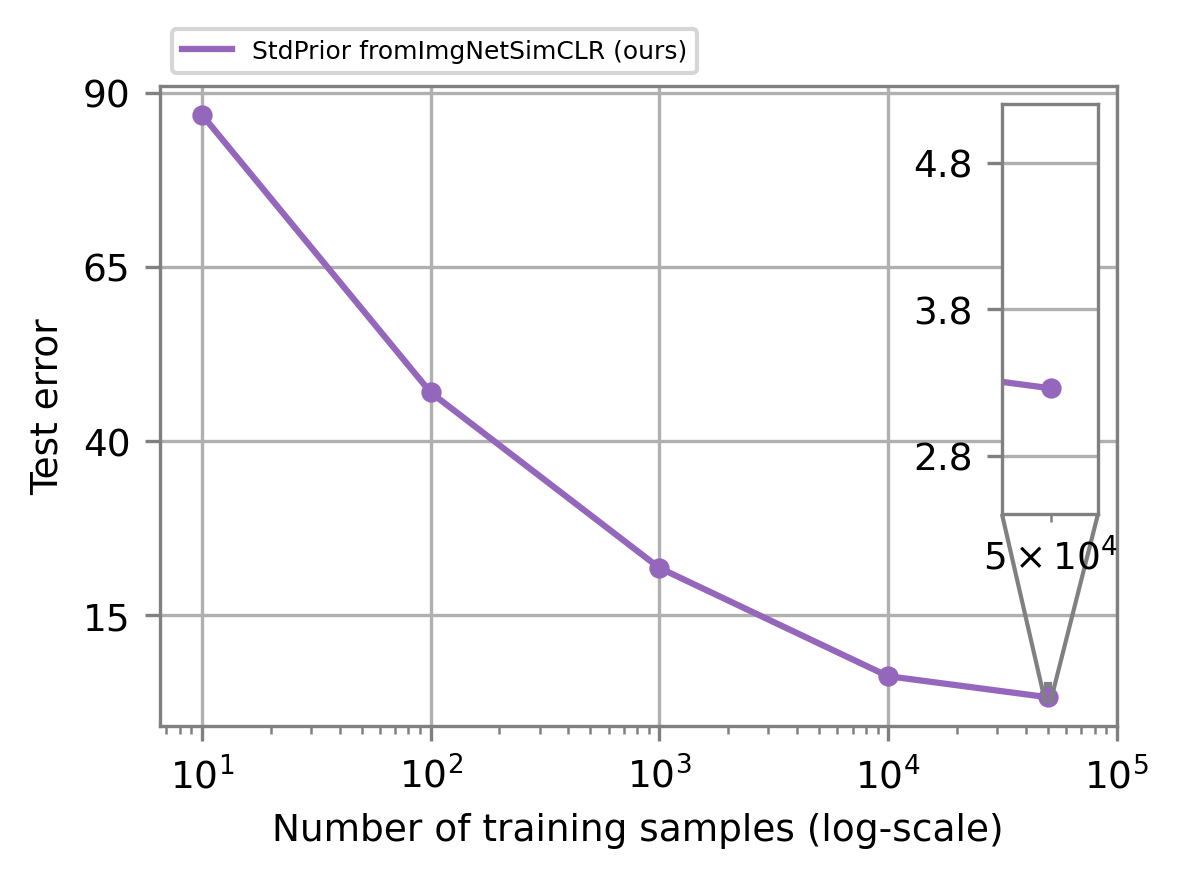

In [7]:
ncols, nrows = 1, 1
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 3*nrows), dpi=300)
ax.plot(results[grouped_results.prior_type=='nonlearned'].n, 100*(1-grouped_results[grouped_results.prior_type=='nonlearned'].test_acc_mean.values), label='StdPrior fromImgNetSimCLR (ours)', color='#9467bd', zorder=3)
ax.scatter(results[results.prior_type=='nonlearned'].n, 100*(1-results[results.prior_type=='nonlearned'].test_acc.values), color='#9467bd', s=15, zorder=3)
# Zoomed section
axins = zoomed_inset_axes(ax, zoom=21, loc='upper right')
axins.plot(grouped_results[grouped_results.prior_type=='nonlearned'].n, 100*(1-grouped_results[grouped_results.prior_type=='nonlearned'].test_acc_mean.values), color='#9467bd')
axins.scatter(results[results.prior_type=='nonlearned'].n, 100*(1-results[results.prior_type=='nonlearned'].test_acc.values), color='#9467bd', s=15)
axins.set_xlim([48850, 51150])
axins.set_ylim([2.4, 5.2])
axins.set_yticks([2.8, 3.8, 4.8])
axins.set_xscale('log')
color_ax(axins)
axins.set_xticks([50000], minor=True)
mark_inset(ax, axins, loc1=3, loc2=4, color='gray')
# Formatting
ax.set_xscale('log')
color_ax(ax)
ax.set_xticks([1e1, 1e2, 1e3, 1e4, 1e5])
ax.set_yticks([15, 40, 65, 90])
ax.set_xlabel('Number of training samples (log-scale)')
ax.set_ylabel('Test error')
legend1 = ax.legend(loc='lower left', bbox_to_anchor=(0, 1), fontsize=6)
#legend1.set_in_layout(False)
fig.tight_layout()
plt.show()